# Tarea 9

## EJERCICIO 2

Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [37]:
using SymPy
using PyPlot

In [38]:
function derivadanumerica(f,a,h)
x=Sym("x") 
    
    x=(f(a+h)-f(a))/h
        
        
  return x 
    
end;

In [39]:
derivadanumerica(x->cos(x),0.5,0.001) #DERIVADA NUMÉRICA DE COS(X) 

-0.479864249944395

In [40]:
x=Sym("x")
diff(cos(x))(0.5)  #RESULTADO EXACTO  DE LA DERIVADA

-0.479425538604203

In [41]:
derivadanumericaArray=zeros(50); #CÁLCULO DE LA DERIVADA
diffArray=zeros(50); #INVERSO
x=1; #DIFERENCIA INICIAL

for i in 1:50 #FOR PARA CALCULAR LAS DERIVADAS E INVERSOS
    derivadanumericaArray[i] = derivadanumerica(cos, 0.5, temp/(100*i));
    diffArray[i]=(100*i)/x;
end

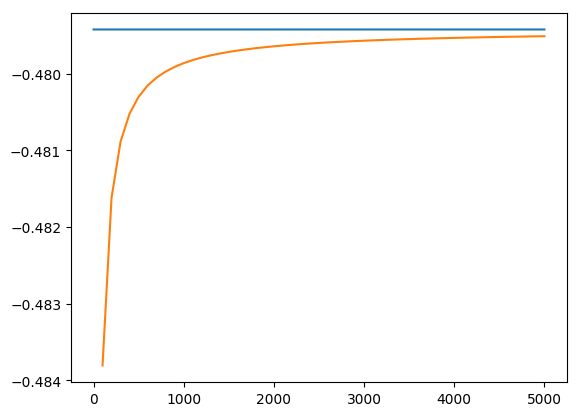

In [42]:
#AHORA GRAFICAMOS:
x=linspace(0,5000,5000);
y=(-sin(0.5))*ones(length(x));
plot(x,y); #VALOR REAL
plot(diffArray,derivadanumericaArray);


In [43]:
#DEFINIMOS EL "ERROR" PARA PODER GRAFICARLO
errorArray=zeros(50);
diffArray=zeros(50);
h=1; #DIFERENCIA INICIAL

for i in 1:50
    errorArray[i]=abs((derivadanumerica(cos, 0.5, h/(100*i))+sin(0.5))/sin(0.5));
    diffArray[i]=h/(100*i);
end

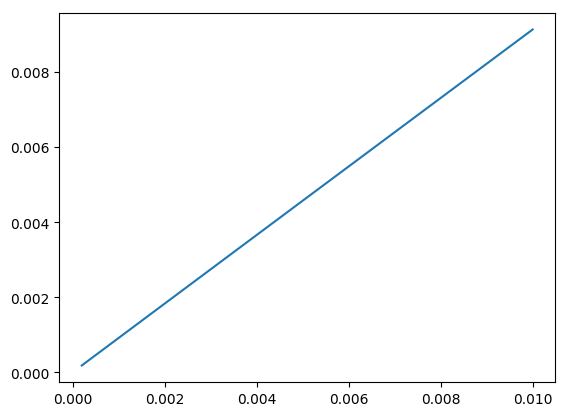

In [44]:
#AHORA GRAFIICAMOS LO ANTERIOR:
plot(diffArray,errorArray);

Notemos que el error es de orden h pues la gráfica nos da una recta.

## EJERCICIO 3
Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

#### SOLUCIÓN

Para resolver esto la idea es considerar la serie de Taylor de $ f(x+h)$ y de $f(x-h)$, restarlas, utilizar una de las expresiones vistas en el notebook de la clase y despejar lo que se pide. Entonces tenemos:

$$f(x+h)=f{\left(x\right)} + h \left. \frac{d}{d \xi} f{\left (\xi \right)} \right|_{\substack{\xi=x}} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d\xi^{2}} f{\left (\xi \right )} \right|_{\substack{\xi=x}} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}f{\left (\xi \right)} \right|_{\substack{\xi=x}} + \mathcal{O}\left(h^{4}\right) = (1)$$

y:

$$f(x-h)=f{\left(x \right)} - h \left. \frac{d}{d \xi} f{\left(\xi \right )}\right|_{\substack{\xi=x}} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d\xi^{2}} f{\left(\xi \right)} \right|_{\substack{\xi=x}} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}} f{\left (\xi \right)} \right|_{\substack{\xi=x}} + \mathcal{O}\left(h^{4}\right)=(2)$$

Al fijarnos en la diferencia, obtenemos:
$$(1)-(2)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{5}\right)$$

Ahora nos fijamos hasta la derivada:
$$(1)-(2)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{3}\right)=(3)$$

Usando las notas del notebook de la clase, tenemos que $\Delta f(x,h)=f(x+h)-f(x)$ $\rightarrow f'(x)=\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}$ Sustituimos esto en (3):

$$\Delta f(x,h)=2h f'(x)+ \mathcal{O}\left(h^{3}\right).$$

Finalmente sólo despejamos:
$$\mathcal{O}\left(h^{2}\right)=\frac{\Delta f(x,h)}{2h}-f'(x)$$

NOTA: en clase demostramos que $\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^2)$

## EJERCICIO 4
Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [45]:
#DEFINIMOS LA FUNCIÓN SIMÉTRICA:
function simetrica(f,x,h)
    y=(f(x+h)-f(x-h))/(2*h);
    return y
end

simetrica (generic function with 1 method)

In [46]:
simetrica(cos, 0.5, 0.001) #COMO EN EL EJERCICIO 2, USAMOS f=cos x=0.5 h=0.001

-0.4794254586999447

In [47]:
x=Sym("x")
diff(cos(x))(0.5)  #RESULTADO EXACTO  DE LA DERIVADA

-0.479425538604203

In [48]:
#SE SIGUEN LOS MISMOS PASOS QUE EN EL EJERCICIO 2:
simetricaArray=zeros(50); #CÁLCULO DE LA DERIVADA
diffsimArray=zeros(50); #INVERSO
h=1; #DIFERENCIA INICIAL

for i in 1:50
    simetricaArray[i]=simetrica(cos, 0.5, h/(100*i));
    diffsimArray[i]=(100*i)/h;
end

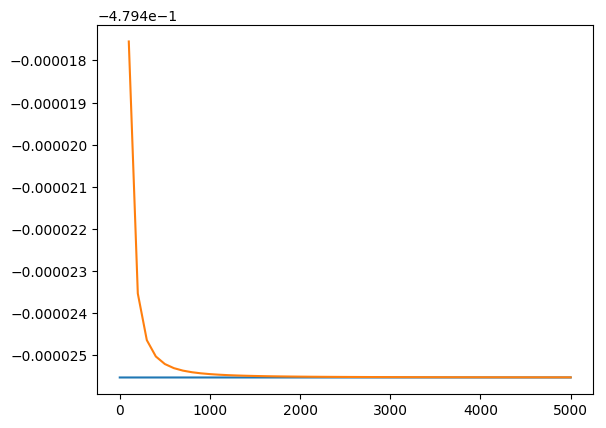

In [49]:
#GRAFICAMOS:
x=linspace(0,5000,5000);
y=(-sin(0.5))*ones(length(x));
plot(x,y); #VALOR REAL
plot(diffsimArray,simetricaArray);


In [50]:
#DEFINIMOS EL "ERROR" COMO EN EL EJERCICIO 2 PARA GRAFICARLO
errorsimArray=zeros(50);
diffsimArray=zeros(50);
h=1; #DIFERENCIA INICIAL

for i in 1:30
    errorsimArray[i]=abs((simetrica(cos, 0.5, h/(100*i))+sin(0.5))/sin(0.5));
    diffsimArray[i]=h/(100*i);
end

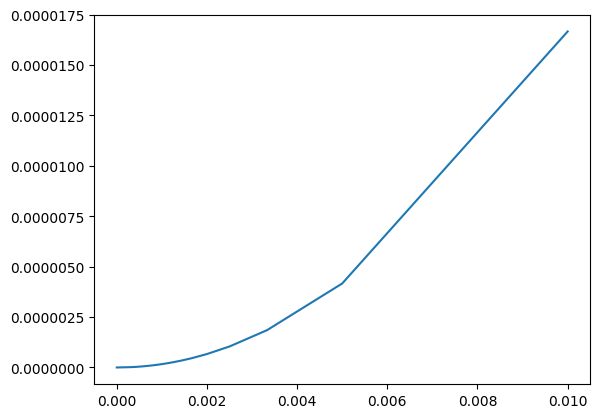

In [51]:
#GRAFICAMOS LO ANTERIOR:
plot(diffsimArray,errorsimArray);

Notemos que en este caso el error relativo absoluto no nos da una recta, pero como las cantidades son muy pequeñas, se puede decir que el error es de orden h.

## EJERCICIO 5
Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

#### SOLUCIÓN
Sean dos funciones $f_{1},f_{2}$ dos funciones y sean $c_{1},c_{2}\in\mathbb{R}$.

$$\Delta_h(c_{1}f_{1}(x)+c_{2}f_{2}(x))=[c_{1}f_{1}(x+h)+c_{2}f_{2}(x+h)]-[c_{1}f_{1}(x)+c_{2}f_{2}(x)]=c_{1}[f_{1}(x+h)-f_{1}(x)]+c_{2}[f_{2}(x+h)-f_{2}(x)]=c_{1}\Delta_hf_{1}(x)+c_{2}\Delta_hf_{2}(x)$$

Por lo tanto:

$$\Delta_h(c_{1}f_{1}(x)+c_{2}f_{2}(x))=c_{1}\Delta_hf_{1}(x)+c_{2}\Delta_hf_{2}(x) $$

Entonces: $\Rightarrow \Delta_h$ es lineal.

## EJERCICIO 6
Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

#### SOLUCIÓN

La idea es tomar la serie de Taylor para la exponencial, evaluar en $h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}$ y simplemennte ver cuánto vale $\phi(x)$. Haciendo esto, tenemos que la exponencial está dada por:

$$e^y=\sum_{n=0}^{\infty} \frac{y^n}{n!}$$

Sacamos el primer término de la suma:

$$e^y=1+\sum_{n=1}^{\infty} \frac{y^n}{n!}$$

Evaluamos en lo mencionado anteriormente, es decir $y=h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$:

$$e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}=\sum_{n=0}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$$

y: 

$$e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}=1+\sum_{n=1}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$$

Notemos que por la hipótesis que se tenía:

$$e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}-1=\sum_{n=1}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)=\Delta_h $$

Por lo tanto:
$$\phi(x)=e^x-1$$